Импортируем библиотеки, загружаем данные:

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_pickle('archive (1)/train.pickle')
train_features, test_features, train_labels, test_labels = train_test_split(
train_data['features'], train_data['labels'], train_size = 0.8, random_state=42)
train_features_dim2 = train_features.reshape(len(train_features), 32*32*3)
test_features_dim2 = test_features.reshape(len(test_features), 32*32*3)

1.(Easy)

Для начала посмотрим, сколько картинок содержится в каждом классе:

In [3]:
count = np.unique(train_labels, return_counts=True)[1]
print(count, '\n')
print(min(count), max(count))

[ 142 1555 1616 1018 1397 1312  304 1048 1023 1067 1468  941 1473 1534
  560  415  283  787  861  154  243  209  265  373  198 1089  430  158
  382  200  301  551  174  491  286  840  263  143 1490  217  230  182
  166] 

142 1616


Как видно, изначально присутствовал дисбаланс классов, поэтому в качестве метрики берем f1_score(для сравнения буду выводить еще accuracy_score)

In [4]:
model = LogisticRegression(max_iter = 200)
model.fit(train_features_dim2, train_labels)
test_predict = model.predict(test_features_dim2)
f1 = f1_score(test_labels, test_predict, average='macro')
print('f1: ', f1)
acc = accuracy_score(test_labels, test_predict)
print('accuracy: ', acc)

f1:  0.9463070066499503
accuracy:  0.9488505747126437


/home/banana_cat/anaconda3/envs/my-environment/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Немного потыкавшись, заметил, что при max_iter > 230 и max_iter < 150 accuracy_score и f1_score ниже, чем при max_iter = 200. Теперь взглянем на confusion_matrix:

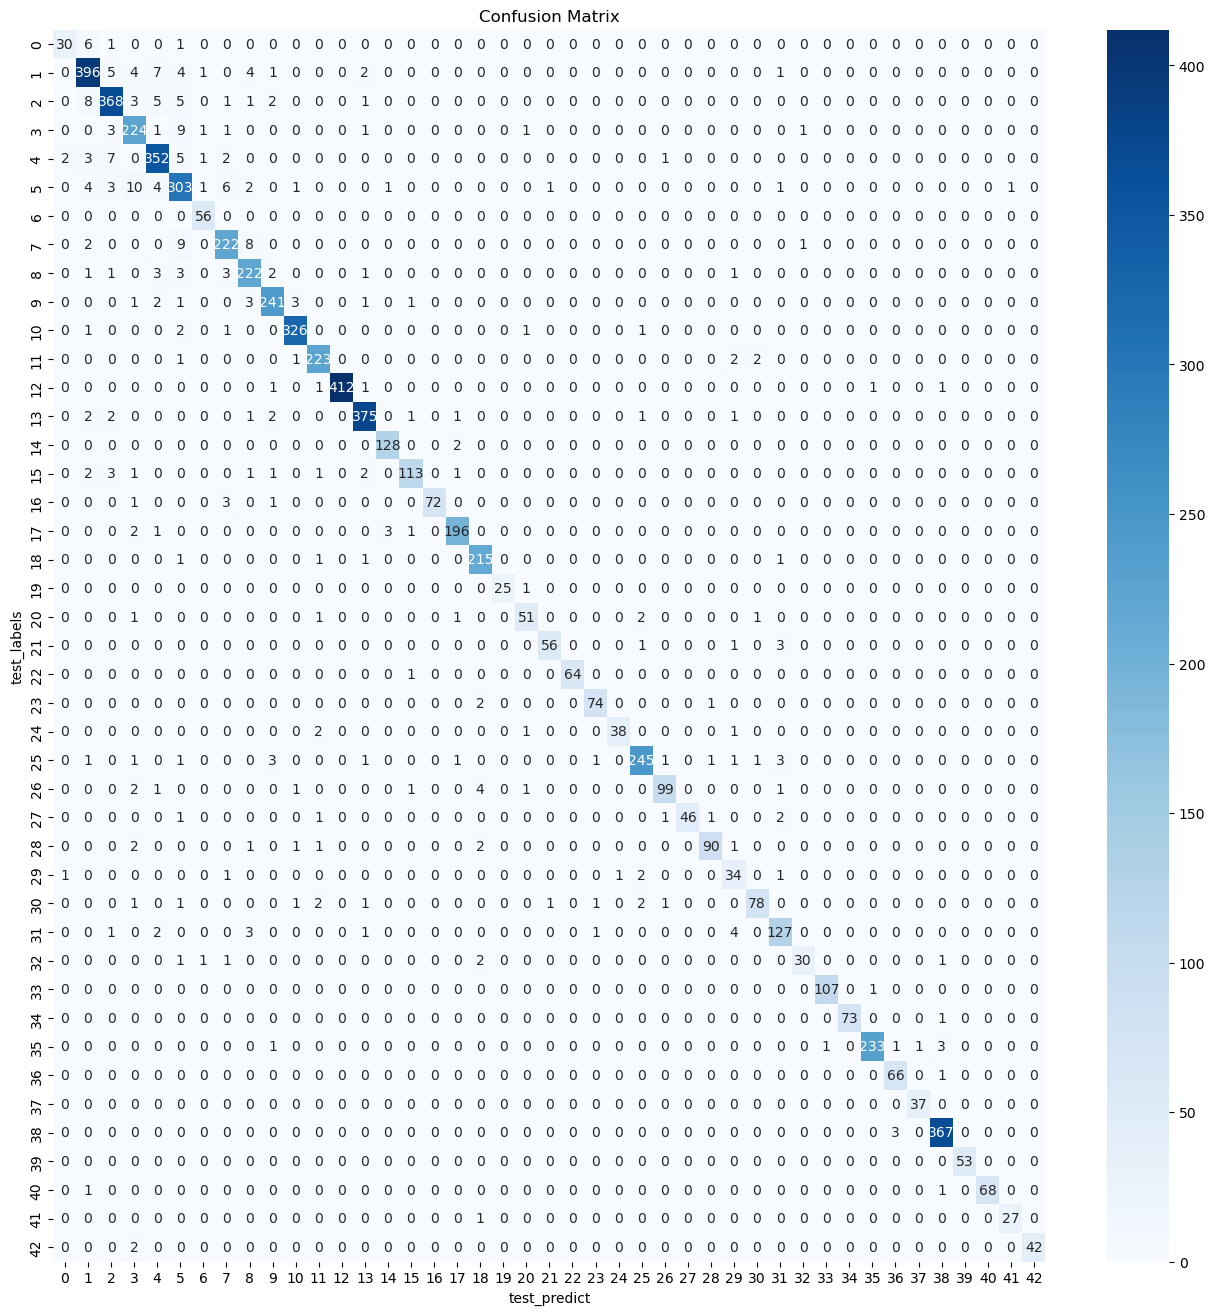

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(test_labels, test_predict)
plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("test_predict")
plt.ylabel("test_labels")
plt.title("Confusion Matrix")
plt.show()

Найдем пару(пары, но тут только одно максимальное значение не на диагонали) знаков, которые больше всех путаются:

In [6]:
df = pd.read_csv('archive (1)/label_names.csv')
values = []
for i in range(43):
    for j in range(43):
        if (i != j):
            values.append(cm[i][j])
max_conf_value = max(values)
for i in range(43):
    for j in range(43):
        if (i != j):
            if (cm[i][j] == max_conf_value):
                print('first_sign:\n', df.iloc[i], '\n', 'second_sign:\n', df.iloc[j], '\n')

first_sign:
 ClassId                        5
SignName    Speed limit (80km/h)
Name: 5, dtype: object 
 second_sign:
 ClassId                        3
SignName    Speed limit (60km/h)
Name: 3, dtype: object 



2.(Medium)

Обучим kNN (Выбран параметр n_neighbors = 5):

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(train_features_dim2, train_labels)
knn_test_predict = knn_model.predict(test_features_dim2)
f1 = f1_score(test_labels, knn_test_predict, average='macro')
print('f1: ', f1)
knn_acc = accuracy_score(test_labels, knn_test_predict)
print('accuracy: ', knn_acc)

f1:  0.8770581814893529
accuracy:  0.8721264367816092


Обучим НБК (берем MultinomialNB, хотя теоретически, если данные распределены нормально, можно было бы взять GaussianNB):

In [8]:
from sklearn.naive_bayes import MultinomialNB
nbk_model = MultinomialNB()
nbk_model.fit(train_features_dim2, train_labels)
nbk_test_predict = nbk_model.predict(test_features_dim2)
f1 = f1_score(test_labels, nbk_test_predict, average='macro')
print('f1: ', f1)
nbk_acc = accuracy_score(test_labels, nbk_test_predict)
print('accuracy: ', nbk_acc)

f1:  0.3305439944550318
accuracy:  0.3275862068965517


Обучим SVM.

Линейное ядро:

In [9]:
from sklearn.svm import SVC
lk_model = SVC(kernel = 'linear')
lk_model.fit(train_features_dim2, train_labels)
lk_test_predict = lk_model.predict(test_features_dim2)
f1 = f1_score(test_labels, lk_test_predict, average='macro')
print('f1: ', f1)
lk_acc = accuracy_score(test_labels, lk_test_predict)
print('accuracy: ', lk_acc)

f1:  0.9527962674469023
accuracy:  0.957183908045977


Полиномиальное ядро:

In [10]:
pk_model = SVC(kernel = 'poly')
pk_model.fit(train_features_dim2, train_labels)
pk_test_predict = pk_model.predict(test_features_dim2)
f1 = f1_score(test_labels, pk_test_predict, average='macro')
print('f1: ', f1)
pk_acc = accuracy_score(test_labels, pk_test_predict)
print('accuracy: ', pk_acc)

f1:  0.7419870736408514
accuracy:  0.7156609195402299


Радиальное базисное ядро:

In [11]:
rbk_model = SVC(kernel = 'rbf')
rbk_model.fit(train_features_dim2, train_labels)
rbk_test_predict = rbk_model.predict(test_features_dim2)
f1 = f1_score(test_labels, rbk_test_predict, average='macro')
print('f1: ', f1)
rbk_acc = accuracy_score(test_labels, rbk_test_predict)
print('accuracy: ', rbk_acc)

f1:  0.8772402998900357
accuracy:  0.8807471264367817


Лучший результат показывает логистическая регрессия, далее - SVC на линейном ядре. Хуже всех оказался НБК, скорее всего, из-за предположения о независимости классов.

3.(Hard) 

Суть задачи состоит в том, чтобы взять какое-нибудь оптимальное количество снимков (заплатив за них не сильно много денег), и каждый снимок размножить с помощью поворотов/изменения цвета(получив с помощью таких операций примерно такое же количество картинок, как в исходном), затем - обучить полученный датасет, получив при этом хороший показатель на метрике.
Я буду брать равное количество картинок для каждого класса, чтобы не было дисбаланса классов.

Итак, вот функция, принимающая на вход датасет, количество картинок, которое надо выбрать с каждого класса, и количество преобразований над каждой картинкой. На выходе получаем новый датасет:

In [12]:
from datasets_preparing import *
def select_balanced_df(features, labels, count, aug_num):
    res_rows = []  
    df = pd.DataFrame(features, columns=[f"ft_{i}" for i in range(len(features[0]))])
    df['labels'] = labels
    for cls in pd.unique(labels):
        mask = (labels == cls)
        for row in df[mask].sample(count).values:
            img = row[:-1].reshape(32, 32, 3)
            for i in range(aug_num):
                new_img = transformation_brightness_rotation(img).reshape(-1)
                new_row = row.copy()
                new_row[:-1] = new_img  # Заменяем значения признаков новыми данными
                res_rows.append(new_row)  # Добавляем строку в список
    res_df = pd.DataFrame(res_rows, columns=df.columns)
    return res_df.drop(columns=['labels']).astype(int), res_df[['labels']].astype(int)

Теперь, пробуя различные комбинации количеств картинок в каждом классе и количеств преобразований, обучим логистическую регрессию(там будут каждый раз вылезать ворнинги, как в 1 номере easy, поэтому я их тут убираю):

In [13]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")

в датасете будет примерно 20000 картинок, (то есть, 43 * counts[i] * aug_nums[i] примерно равно 20000)

In [14]:
model = LogisticRegression(max_iter = 200)
counts = [1, 5, 10, 20, 30, 40, 50, 60, 65, 70, 75, 80, 85, 90, 95, 100]
aug_nums = [min(450 // i, 80) for i in counts]
f1_scores = []
accuracies = []
for i in range(16):
        X_train, y_train = select_balanced_df(train_features_dim2, train_labels, counts[i], aug_nums[i])
        y_train = y_train.values.reshape(-1)
        model.fit(X_train, y_train)
        test_predict = model.predict(test_features_dim2)
        print('count:', counts[i], 'aug_num:', aug_nums[i])
        f1 = f1_score(test_labels, test_predict, average='macro')
        print('f1:', f1)
        acc = accuracy_score(test_labels, test_predict)
        print('accuracy:', acc)
        f1_scores.append(f1)
        accuracies.append(acc)

count: 1 aug_num: 80
f1: 0.12115498303561444
accuracy: 0.1375
count: 5 aug_num: 80
f1: 0.408270971521674
accuracy: 0.3997126436781609
count: 10 aug_num: 45
f1: 0.5080630281456086
accuracy: 0.5132183908045977
count: 20 aug_num: 22
f1: 0.6471020968366366
accuracy: 0.6512931034482758
count: 30 aug_num: 15
f1: 0.681955286217007
accuracy: 0.6893678160919541
count: 40 aug_num: 11
f1: 0.740595307870311
accuracy: 0.7551724137931034
count: 50 aug_num: 9
f1: 0.7454271808879095
accuracy: 0.7558908045977012
count: 60 aug_num: 7
f1: 0.7815363803969945
accuracy: 0.7895114942528736
count: 65 aug_num: 6
f1: 0.7792538049615461
accuracy: 0.7908045977011494
count: 70 aug_num: 6
f1: 0.8035976856794484
accuracy: 0.8089080459770115
count: 75 aug_num: 6
f1: 0.7940643064184632
accuracy: 0.7989942528735632
count: 80 aug_num: 5
f1: 0.7950266045167729
accuracy: 0.8091954022988506
count: 85 aug_num: 5
f1: 0.8185266202283991
accuracy: 0.8284482758620689
count: 90 aug_num: 5
f1: 0.829776612530811
accuracy: 0.838936

А теперь, изобразим график зависимости f1 от количества исходных выбранных картинок до преобразования(аналогичный график будет и для accuraсy, разница f1 и accuracy менее 0,15(видимо, потому что данные распределены равномерно по классам)):

Text(0, 0.5, 'accuracies')

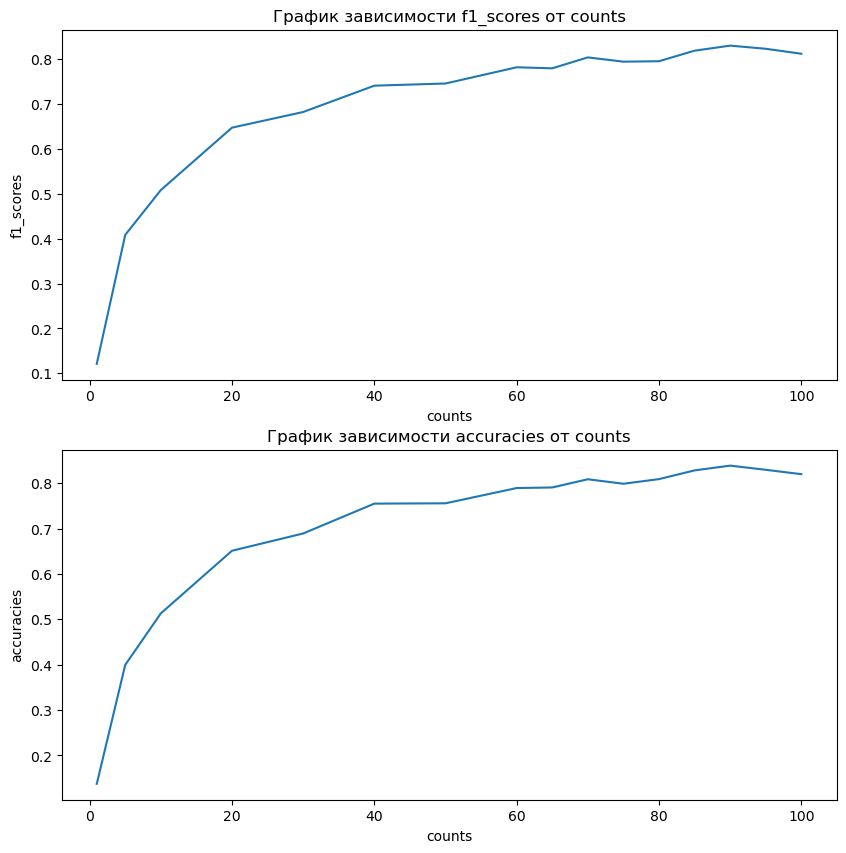

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
f_column = pd.Series(counts)
s_column = pd.Series(f1_scores)
df1 = pd.DataFrame({'counts': f_column, 'f1_scores': s_column})
ss_column = pd.Series(accuracies)
df2 = pd.DataFrame({'counts': f_column, 'accuracies': ss_column})
fig, axs = plt.subplots(2, figsize = (10, 10))
sns.lineplot(data = df1, x = "counts", y = "f1_scores", ax=axs[0]).set(title = "График зависимости f1_scores от counts")
plt.xlabel("counts")
plt.ylabel("f1_scores")
sns.lineplot(data = df2, x = "counts", y = "accuracies", ax=axs[1]).set(title = "График зависимости accuracies от counts")
plt.xlabel("counts")
plt.ylabel("accuracies")

Самое оптимальное количество картинок, которое надо выбрать с каждого класса - 65 - 70 (если ресурсы сильно ограничены, то можно к примеру и 50-60). Если ресурсы неограничены, можно взять и 95 с каждого класса. 